<a href="https://colab.research.google.com/github/omkarbhosale1623/My-Projects/blob/main/Salary_Estimation_using_K_NEAREST_NEIGHBOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting whether the job Applicant got Salary Above 50k or Not from Previous-HR.**

In [1]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import files
uploaded = files.upload()

Saving SalaryEstimation_dataset.csv to SalaryEstimation_dataset (2).csv


**Load Dataset**

In [6]:
dataset = pd.read_csv('SalaryEstimation_dataset.csv')
dataset

,Age,EducationNumber,CapitalGain,HoursPerWeek,SalaryCategory
0,49,12,11848,34,below 50K
1,25,14,16220,42,below 50K
2,28,5,58437,56,below 50K
3,23,14,49719,46,below 50K
4,46,16,66960,23,below 50K
...,...,...,...,...,...
395,40,15,42649,26,below 50K
396,44,3,87034,43,below 50K
397,59,6,10058,51,below 50K
398,44,3,92909,58,below 50K


**Summarize Dataset**

In [7]:
print(dataset.shape)
print(dataset.head(5))

(400, 5)
   Age  EducationNumber  CapitalGain  HoursPerWeek SalaryCategory
0   49               12        11848            34      below 50K
1   25               14        16220            42      below 50K
2   28                5        58437            56      below 50K
3   23               14        49719            46      below 50K
4   46               16        66960            23      below 50K


**Mapping Salary Data to Binary Values**

In [9]:
income_set = set(dataset['SalaryCategory'])
dataset['SalaryCategory'] = dataset['SalaryCategory'].str.lower().map({'below 50k': 0, 'above 50k': 1}).astype(int)
print(dataset.head())

   Age  EducationNumber  CapitalGain  HoursPerWeek  SalaryCategory
0   49               12        11848            34               0
1   25               14        16220            42               0
2   28                5        58437            56               0
3   23               14        49719            46               0
4   46               16        66960            23               0


**Segregate Dataset into X(input) & Y(output)**

In [10]:
X = dataset.iloc[:,:-1].values
X

array([[   49,    12, 11848,    34],
       [   25,    14, 16220,    42],
       [   28,     5, 58437,    56],
       ...,
       [   59,     6, 10058,    51],
       [   44,     3, 92909,    58],
       [   28,     3, 30254,    55]])

In [11]:
Y = dataset.iloc[:,-1].values
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Splitting Dataset into Train & Test**

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)

**Feature Scaling**
we scale our data to make all the features contribute equally to the result
Fit_transform -fit method is calculating the mean &the variance of each of the features present in our data. Transform - Transform method is transforming all the features using the respective mean & variance.
we want our test data to be a completely new & a surprise set for our model.

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.transform(X_test)
X_train

array([[ 0.38018496,  1.62075906, -1.56421998,  0.77472098],
       [ 0.66657665,  1.20747583,  0.49813597, -0.88103814],
       [ 0.30858704,  1.62075906,  0.67331245,  1.64617314],
       ...,
       [ 1.66894756, -0.65229869,  1.39374656,  1.47188271],
       [-0.04940257,  0.38090937,  0.63918716,  0.25184968],
       [-0.90857763,  0.38090937, -0.83393878,  0.16470446]])

**Finding the Best K-Value**

Text(0, 0.5, 'Mean Error')

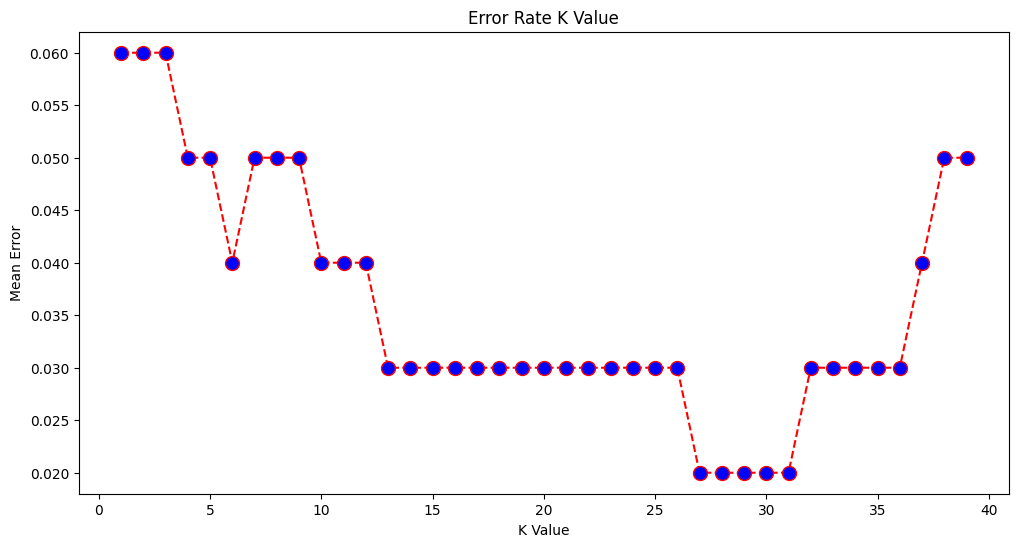

In [15]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
#calculating error for K values between 1 & 40
for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,Y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

**Training**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 27, metric = 'minkowski', p = 2)
model.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=27)

**Predicting**

In [21]:
age = int(input("Enter the New Employee's Age : "))
edu = int(input("Enter the New Employee's Education : "))
cg = int(input("Enter the New Employee's Capital Gain : "))
Hr_week = int(input("Enter the New Employee's Hour's per week : "))
newEmp = [[age,edu,cg,Hr_week]]
result = model.predict(sc.transform(newEmp))
print(result)
if result == 1:
  print("Employee might got Salary above 50k")
else:
  print("Employee might Not got Salary Above 50k")

Enter the New Employee's Age : 25
Enter the New Employee's Education : 10
Enter the New Employee's Capital Gain : 100
Enter the New Employee's Hour's per week : 20
[0]
Employee might Not got Salary Above 50k


**Prediction for all Test Data**

In [19]:
Y_pred = model.predict(X_test)

**Evaluating Model-Confusion Matrix**

In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model : {0}% ".format(accuracy_score(Y_test,Y_pred)*100))

Accuracy of the Model : 98.0% 
